In [5]:
from IPython.display import Image

import supervision as sv
from supervision.metrics import MeanAveragePrecision

from ultralytics import YOLO

In [1]:
model = YOLO('yolov8s.pt')

In [ ]:
results = model.train(data=f'data.yaml', epochs=100)

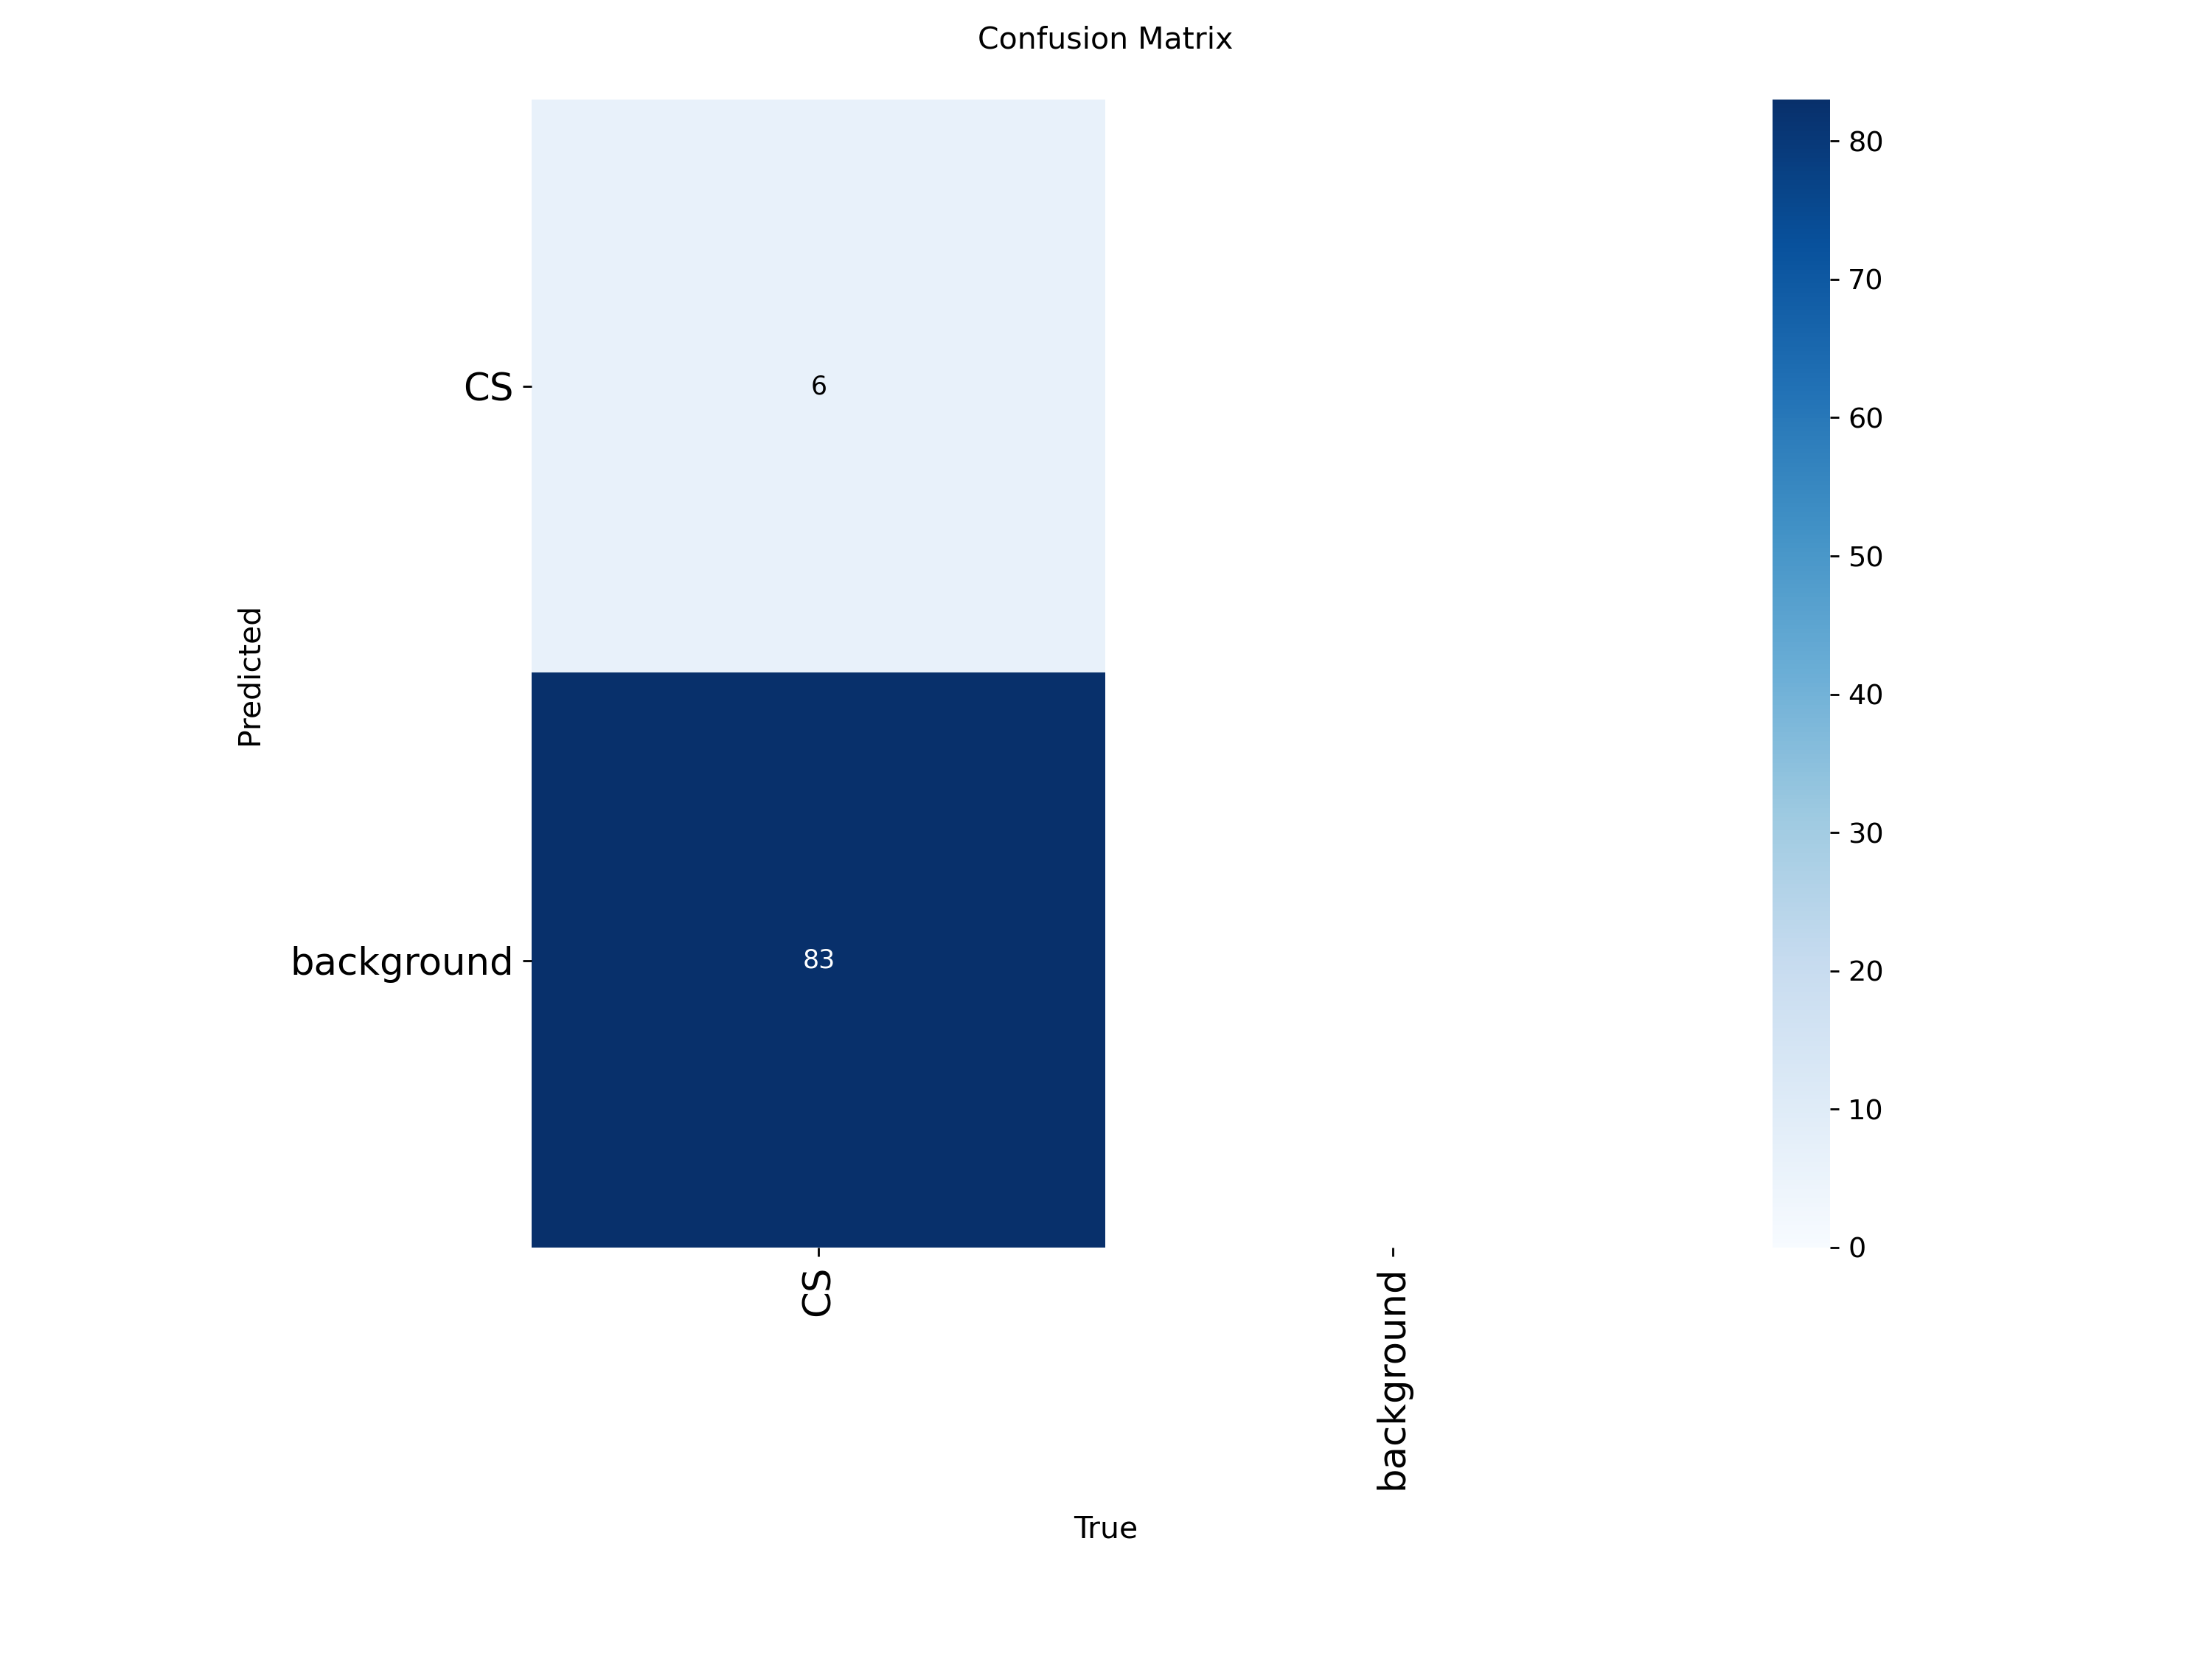

In [7]:
dirs = 'train7'

Image(filename=f'runs/detect/{dirs}/confusion_matrix.png', width=1000)

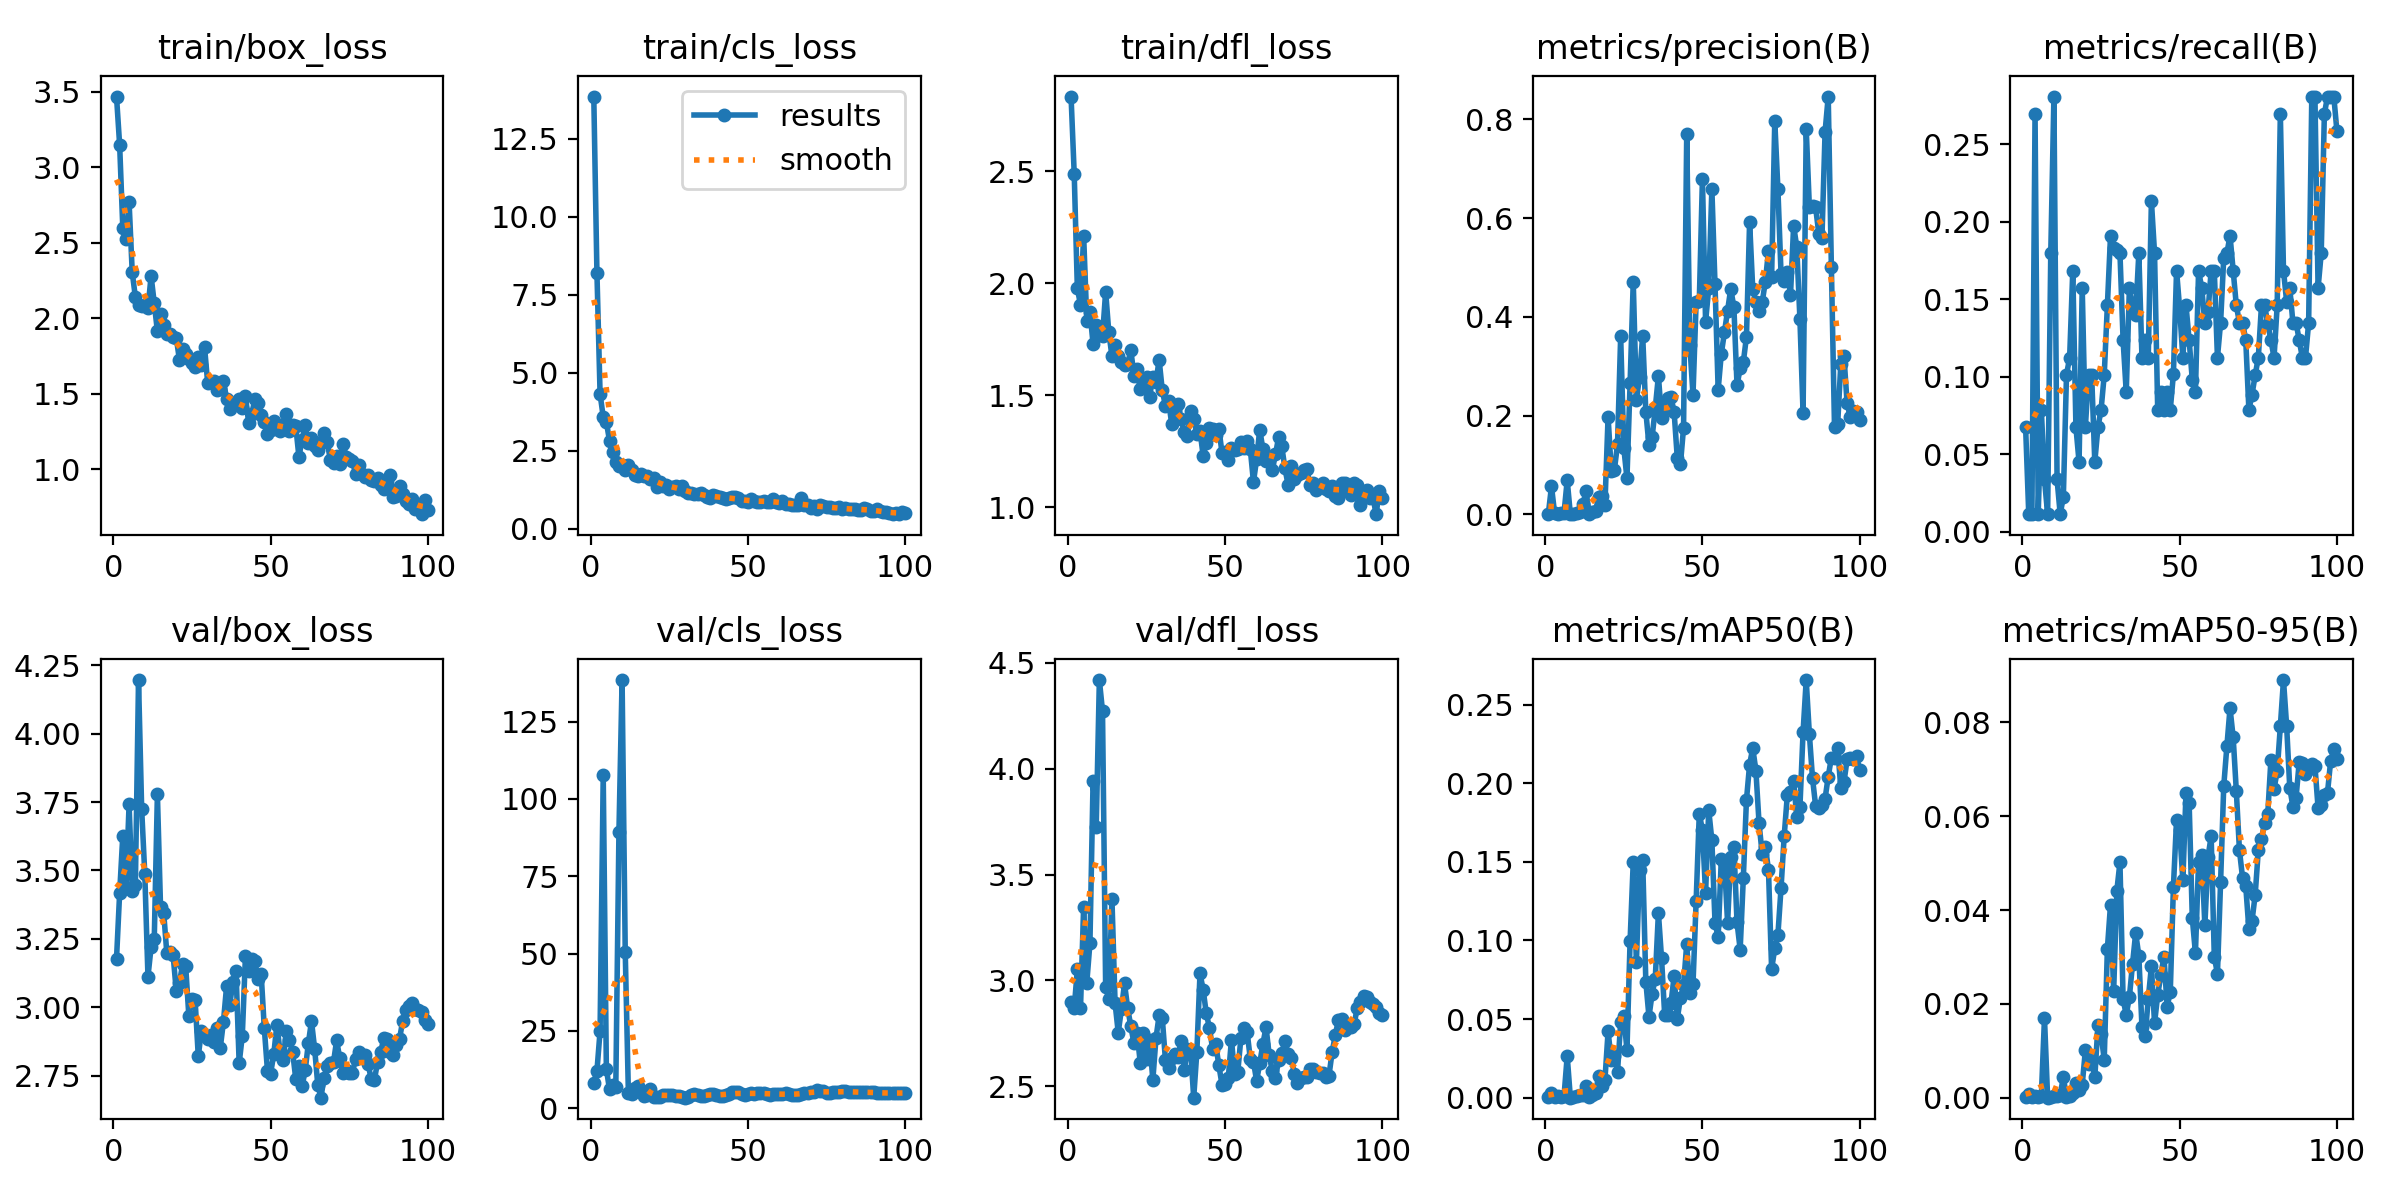

In [8]:

Image(filename=f'runs/detect/{dirs}/results.png', width=1000)


In [9]:

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"yolo_export/test/images",
    annotations_directory_path=f"yolo_export/test/labels",
    data_yaml_path=f"data.yaml"
)

ds.classes

['CS']

In [10]:
model = YOLO(f'runs/detect/{dirs}/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [11]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.03773377337733773
mAP 50 0.1188118811881188
mAP 75 0.0066006600660066


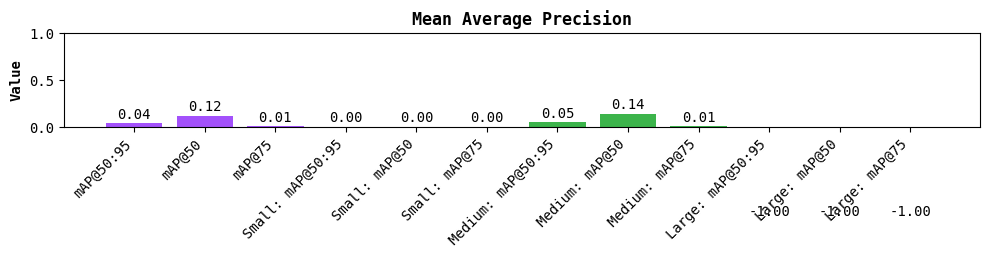

In [12]:
%matplotlib inline

map.plot()

In [13]:

model = YOLO(f'runs/detect/{dirs}/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"yolo_export/test/images",
    annotations_directory_path=f"yolo_export/test/labels",
    data_yaml_path=f"data.yaml"
)
    

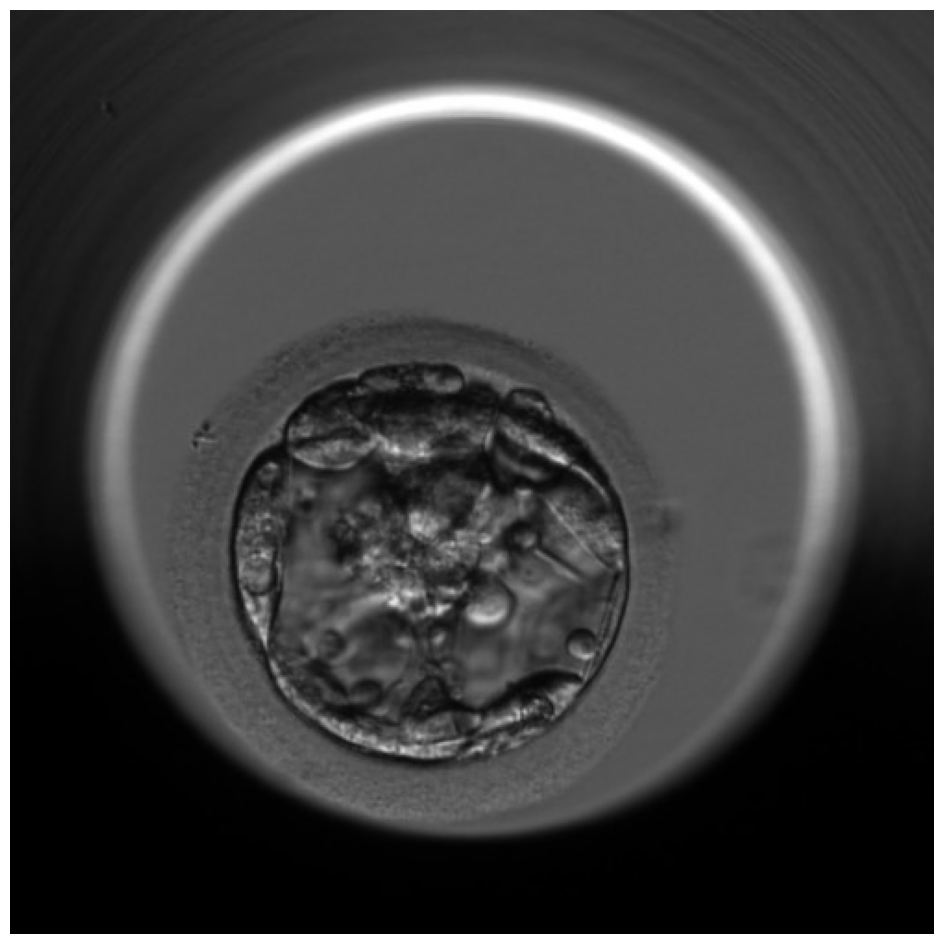

In [16]:

import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)